# Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Примечание:

Примечание:
Оператор всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

**Перечень задач:**

*    Изучить общую информацию: Информация о звонках, интернет-сессиях, сообщениях, тарифах, пользователях.
*    Посчитайте для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам; помесячную выручку с каждого пользователя.
*    Проанализировать данные: описать поведение клиентов оператора, исходя из выборки; cколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц; посчитать среднее количество, дисперсию и стандартное отклонение; построить гистограммы, описать распределения.
*    Проверить гипотезы: 1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются; 2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
*    Общий вывод. В какой тариф следует вложить рекламный бюджет?


##  Знакомство с данными и изучение общей информации

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
from scipy import stats as st # импорт библиотеки stats

### Информация о звонках

In [2]:
calls = pd.read_csv('***.csv') # чтение файла с данными и сохранение в переменной calls
print(calls.info()) # общая информация
calls.head() # вывод первых 5 строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Таблица calls (информация о звонках):

*    `id` — уникальный номер звонка
*    `call_date` — дата звонка
*    `duration` — длительность звонка в минутах
*    `user_id` — идентификатор пользователя, сделавшего звонок

Пропущенных значений нет. Есть звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять. Других проблем в данных нет. Далее необходимо будет округлить звонки до минут в бо́льшую сторону, так как Оператор всегда округляет секунды до минут. 

### Информация об интернет-сессиях

In [3]:
internet = pd.read_csv('***.csv') # чтение файла с данными и сохранение в переменной internet
print(internet.info()) # общая информация
internet.head() # вывод первых 5 строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Таблица internet (информация об интернет-сессиях):

*    `id` — уникальный номер сессии
*    `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
*    `session_date` — дата интернет-сессии
*    `user_id` — идентификатор пользователя
    
Пропущенных значений нет. Датафрейм содержит колонку 'Unnamed:0', которая возникает, когда данные сохраняют с указанием индекса pd.DataFrame().to_csv(..., index=column).

### Информация о сообщениях

In [4]:
messages = pd.read_csv('***.csv') # чтение файла с данными и сохранение в переменной messages
print(messages.info()) # общая информация
messages.head() # вывод первых 5 строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Таблица messages (информация о сообщениях):

*    `id` — уникальный номер сообщения
*    `message_date` — дата сообщения
*    `user_id` — идентификатор пользователя, отправившего сообщение

Пропущенных значений нет. Других проблем в данных тоже нет.

### Информация о тарифах

In [5]:
tariffs = pd.read_csv('***.csv') # чтение файла с данными и сохранение в переменной tariffs
print(tariffs.info()) # общая информация
tariffs # знакомство с тарифами

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица tariffs (информация о тарифах):

*    `tariff_name` — название тарифа
*    `rub_monthly_fee` — ежемесячная абонентская плата в рублях
*    `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
*    `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
*    `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
*    `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
*    `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
*    `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Тариф «Смарт»

    1. Ежемесячная плата: 550 рублей
    2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    3. Стоимость услуг сверх тарифного пакета:
       - минута разговора: 3 рубля
       - сообщение: 3 рубля
       - 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

    1. Ежемесячная плата: 1950 рублей
    2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    3. Стоимость услуг сверх тарифного пакета:
       - минута разговора: 1 рубль
       - сообщение: 1 рубль
       - 1 Гб интернет-трафика: 150 рублей
Пропущенных значений нет. Других проблем в данных тоже нет.

### Информация о пользователях

In [6]:
users = pd.read_csv('***.csv') # чтение файла с данными и сохранение в переменной users
print(users.info()) # общая информация
users.head() # вывод первых 5 строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Таблица users (информация о пользователях):

*    `user_id` — уникальный идентификатор пользователя
*    `first_name` — имя пользователя
*    `last_name` — фамилия пользователя
*    `age` — возраст пользователя (годы)
*    `reg_date` — дата подключения тарифа (день, месяц, год)
*    `churn_date` — дата прекращения пользования тарифом
*    `city` — город проживания пользователя
*    `tariff` — название тарифного плана

Есть пропущенные значения в колонке `churn_date`. Это значит тариф ещё действовал на момент выгрузки данных.

**Вывод:**

В исследовании дано 5 таблиц, с информацией о клиентах, тарифах, звонках, смс и интернет-трафике. Этих данных достаточно для проведения исследования. Есть уникальный идентификатор пользователя, по которому можно объединять данные. Есть небольшая проблема с таблицей интернет-трафика.

Для дальнейшего исследования необходимо объединить данные из разных таблиц.

## Подготовка данных.

### Исправление ошибок в данных

In [7]:
internet = pd.read_csv('***.csv', index_col=0) # Правка столбца 'Unnamed: 0'
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Поправил столбец 'Unnamed: 0', других ошибок не обнаружено.

### Приведение к нужным типам.

In [8]:
calls['duration'] = np.ceil(calls['duration']).astype('int64') # округление до минут в большую сторону, перевод в  целые числа

Данные с длительностью звонков округлены в большую сторону и переведены в целые числа.

### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [9]:
calls['month'] = pd.to_datetime(calls['call_date'], format='%Y%m%dT').dt.month # добавление столбца с месяцем
calls_count = calls.pivot_table(index=['user_id'], values ='id',columns='month',aggfunc='count')
# подсчет количества звонков
calls_count = calls_count.merge(users[['user_id','tariff']],on='user_id') # добавление столбца с тарифом
calls_count

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0,ultra
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0,smart
2,1002,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0,smart
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0,ultra
4,1004,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,112.0,152.0,129.0,155.0,ultra
488,1496,7.0,77.0,79.0,67.0,63.0,74.0,73.0,88.0,68.0,72.0,80.0,80.0,smart
489,1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,64.0,71.0,smart
490,1498,NaN,NaN,NaN,NaN,NaN,NaN,23.0,57.0,59.0,41.0,NaN,NaN,smart


In [10]:
# общее количество звонков пользователей тарифа Ультра
calls_count[calls_count['tariff']=='ultra'].drop(columns = ['user_id','tariff'], axis = 1).count().sum()

951

In [11]:
# общее количество звонков пользователей тарифа Смарт
calls_count[calls_count['tariff']=='smart'].drop(columns = ['user_id','tariff'], axis = 1).count().sum()

2223

In [12]:
calls_sum = calls.pivot_table(index=['user_id'], values ='duration',columns=['month'],aggfunc='sum').fillna(0)
# подсчет израсходованных минут, заполнил пропуски нулями
calls_sum = calls_sum.merge(users[['user_id','tariff']],on='user_id') # добавление столбца с тарифом
calls_sum

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,0.0,0.0,0.0,0.0,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,ultra
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,430.0,414.0,smart
2,1002,0.0,0.0,0.0,0.0,0.0,117.0,214.0,289.0,206.0,212.0,243.0,236.0,smart
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380.0,961.0,855.0,824.0,802.0,ultra
4,1004,0.0,0.0,0.0,0.0,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,813.0,1030.0,954.0,1031.0,ultra
488,1496,48.0,594.0,557.0,521.0,484.0,555.0,582.0,527.0,486.0,450.0,662.0,518.0,smart
489,1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,490.0,371.0,545.0,smart
490,1498,0.0,0.0,0.0,0.0,0.0,0.0,175.0,400.0,471.0,247.0,0.0,0.0,smart


Появились пустые значения, это значит, что у клиента не был подключен тариф в этом месяце и он не пользовался услугами.

Количество строк не равно общему количеству пользователей, значит не все пользовались звонками. А именно 8 человек.

### Количество отправленных сообщений по месяцам

In [13]:
messages['month']=pd.to_datetime(messages['message_date'], format='%Y%m%dT').dt.month # добавление столбца с месяцем
messages_count = messages.pivot_table(index=['user_id'], values ='id',columns='month',aggfunc='count').fillna(0)
# подсчет отправленных сообщений
messages_count = messages_count.merge(users[['user_id','tariff']],on='user_id') # добавление столбца с тарифом
messages_count

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,0.0,0.0,0.0,0.0,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,ultra
1,1002,0.0,0.0,0.0,0.0,0.0,4.0,11.0,13.0,4.0,10.0,16.0,12.0,smart
2,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,91.0,83.0,94.0,75.0,ultra
3,1004,0.0,0.0,0.0,0.0,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0,ultra
4,1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0,smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,82.0,82.0,79.0,84.0,ultra
422,1496,9.0,45.0,46.0,49.0,40.0,35.0,42.0,41.0,29.0,35.0,46.0,51.0,smart
423,1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,14.0,17.0,smart
424,1498,0.0,0.0,0.0,0.0,0.0,0.0,20.0,62.0,44.0,42.0,0.0,0.0,smart


Сообщениями не пользовались 74 клиента.

### Объем израсходованного интернет-трафика по месяцам

In [14]:
internet['month']=pd.to_datetime(internet['session_date'], format='%Y%m%dT').dt.month # добавление столбца с месяцем
internet_sum = (internet.pivot_table(index=['user_id'], values ='mb_used',columns='month',aggfunc='sum')/1024).apply(np.ceil).fillna(0) 
# подсчет израсходованного интернет-трафика, перевод в гигабайты, округление в большую сторону
internet_sum = internet_sum.merge(users[['user_id','tariff']],on='user_id') # добавление столбца с тарифом
internet_sum

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,0.0,0.0,0.0,0.0,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0,ultra
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,14.0,smart
2,1002,0.0,0.0,0.0,0.0,0.0,11.0,18.0,20.0,17.0,14.0,19.0,18.0,smart
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,13.0,15.0,12.0,10.0,ultra
4,1004,0.0,0.0,0.0,0.0,14.0,18.0,22.0,28.0,15.0,19.0,16.0,18.0,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,33.0,29.0,39.0,23.0,ultra
493,1496,4.0,28.0,25.0,21.0,24.0,20.0,24.0,23.0,27.0,28.0,25.0,21.0,smart
494,1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,14.0,20.0,smart
495,1498,0.0,0.0,0.0,0.0,0.0,0.0,8.0,24.0,22.0,21.0,0.0,0.0,smart


Интернет - самая популярная услуга, только 3 человека не пользовались ею.

#### Предварительная группировка данных по пользователям и месяцам.

In [15]:
calls_month = calls.groupby(['user_id','month']).agg({'id':'count', 'duration':'sum'}).reset_index()
calls_month.rename(columns={'id':'calls_count','duration':'calls_duration'},inplace=True)
calls_month.head()

,user_id,month,calls_count,calls_duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


In [16]:
messages_month = messages.groupby(['user_id','month']).id.count().reset_index()
messages_month.rename(columns={'id':'messages_count'},inplace=True)
messages_month.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [17]:
internet_month = internet.groupby(['user_id','month']).mb_used.sum().reset_index()
internet_month['mb_used'] = np.ceil(internet_month['mb_used']/1024).astype('int64')
internet_month.rename(columns={'mb_used':'gb_used'},inplace=True)
internet_month.head()

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


#### Объединение по пользователям и месяцам данных о звонках, СМС и интернете.

In [18]:
data_merged = calls_month.merge(messages_month, on = ['user_id','month'], how='outer') \
                         .merge(internet_month, on = ['user_id','month'], how='outer')
data_merged.head()

,user_id,month,calls_count,calls_duration,messages_count,gb_used
0,1000,5,22.0,159.0,22.0,3.0
1,1000,6,43.0,172.0,60.0,23.0
2,1000,7,47.0,340.0,75.0,14.0
3,1000,8,52.0,408.0,81.0,14.0
4,1000,9,58.0,466.0,57.0,15.0


#### Присоединение к таблице данных о тарифе и городе пользователей

In [19]:
data_merged = data_merged.merge(users[['user_id','city','tariff']], on=['user_id'], how='left')
tariffs.rename(columns={'tariff_name':'tariff'},inplace=True)
data_merged = data_merged.merge(tariffs, on=['tariff'], how='left')
data_merged['mb_per_month_included'] = data_merged['mb_per_month_included']/1024
data_merged.rename(columns={'mb_per_month_included':'gb_per_month_included'},inplace=True)
data_merged = data_merged.fillna(0)
data_merged.head()

,user_id,month,calls_count,calls_duration,messages_count,gb_used,city,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,3.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,15.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1


#### Проверка уникальных пользователей в объединенной таблице.

In [20]:
data_merged['user_id'].value_counts()

1135    12
1472    12
1113    12
1282    12
1032    12
        ..
1236     1
1074     1
1069     1
1252     1
1368     1
Name: user_id, Length: 498, dtype: int64

#### Помесячная выручка с каждого пользователя. 

In [21]:
def data_proceed(row):
    if row['calls_duration'] <= row['minutes_included']:
        proceed_calls = 0
    else:
        proceed_calls = (row['calls_duration'] - row['minutes_included'])*row['rub_per_minute']
    if row['messages_count'] <= row['messages_included']:
        proceed_sms = 0
    else:
        proceed_sms = (row['messages_count'] - row['messages_included'])*row['rub_per_message']
    if row['gb_used'] <= row['gb_per_month_included']:
        proceed_int = 0
    else:
        proceed_int = (row['gb_used'] - row['gb_per_month_included'])*row['rub_per_gb']
    return proceed_calls + proceed_sms + proceed_int + row['rub_monthly_fee']

In [22]:
data_merged['proceed'] = data_merged.apply(data_proceed,axis = 1)
data_merged

,user_id,month,calls_count,calls_duration,messages_count,gb_used,city,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,proceed
0,1000,5,22.0,159.0,22.0,3.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,1950.0
1,1000,6,43.0,172.0,60.0,23.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,1950.0
2,1000,7,47.0,340.0,75.0,14.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,1950.0
3,1000,8,52.0,408.0,81.0,14.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,1950.0
4,1000,9,58.0,466.0,57.0,15.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,950.0
3210,1489,10,0.0,0.0,21.0,20.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,1550.0
3211,1489,11,0.0,0.0,20.0,18.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,1150.0
3212,1489,12,0.0,0.0,35.0,17.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,950.0


In [23]:
final_sum = data_merged.pivot_table(index='user_id',values='proceed',columns='month',aggfunc='sum')
final_sum = final_sum.merge(users[['user_id','tariff']],on='user_id').fillna(0)
final_sum

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,ultra
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1150.0,550.0,smart
2,1002,0.0,0.0,0.0,0.0,0.0,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0,smart
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,ultra
4,1004,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,2400.0,1950.0,3300.0,1950.0,ultra
494,1496,550.0,3432.0,2721.0,1813.0,2350.0,1715.0,2596.0,2231.0,2950.0,3150.0,3036.0,1807.0,smart
495,1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0,550.0,1685.0,smart
496,1498,0.0,0.0,0.0,0.0,0.0,0.0,550.0,2386.0,1950.0,1750.0,0.0,0.0,smart


In [24]:
internet_sum['source'] = 'internet' # добавление столбца 'source'
messages_count['source'] = 'sms' # добавление столбца 'source'
calls_sum['source'] = 'calls' # добавление столбца 'source'

df = pd.concat([internet_sum,messages_count,calls_sum],axis=0) # сложение таблиц по столбцам
df = df.sort_values('user_id').reset_index(drop='True') # сортировка по 'user_id' со сбросом индексов
df.head() # вывод суммарной таблицы по пользователям помесячно с каждой услугой и указанием тарифа

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff,source
0,1000,0.0,0.0,0.0,0.0,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0,ultra,internet
1,1000,0.0,0.0,0.0,0.0,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,ultra,sms
2,1000,0.0,0.0,0.0,0.0,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,ultra,calls
3,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,430.0,414.0,smart,calls
4,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,14.0,smart,internet


Я заметил, что 2 клиента вообще не воспользовались услугами.

In [25]:
set(range(1000,1500)).difference(final_sum['user_id']) # нашел отсутствующие значения

{1128, 1371}

In [26]:
display(users[users['user_id']==1128],users[users['user_id']==1371]) # выборка из двух клиентов

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


In [27]:
# Подсчет общей выручки по тарифам
print ('Общая выручка по тарифу Смарт:', \
       final_sum[final_sum['tariff']=='smart'].drop(columns = ['user_id','tariff']).sum().sum(), 'руб.')
print ('Общая выручка по тарифу Ультра:', \
       final_sum[final_sum['tariff']=='ultra'].drop(columns = ['user_id','tariff']).sum().sum(), 'руб.')

Общая выручка по тарифу Смарт: 2875351.0 руб.
Общая выручка по тарифу Ультра: 2039100.0 руб.


Видно, что клиенты не пользовались тарифом, их нет в сводной таблице. А разница в датах открытия и закрытия тарифа всего несколько дней, подтверждает, что это не ошибка, а не использование тарифа. Возможно сим-карта не была активирована, а затем отключена, либо расторгнут договор.

***Вывод:***

Я посчитал для каждого пользователя:
  -  количество сделанных звонков и израсходованных минут разговора по месяцам;
  -  количество отправленных сообщений по месяцам;
  -  объем израсходованного интернет-трафика по месяцам;
  -  помесячную выручку с каждого пользователя.
  
Данные этих таблиц помогут проанализировать поведение клиентов, сравнить тарифы и проверить гипотезы. Присутствует выборка по 498 клиентам из 500. 2 пользователя совсем не пользовались услугами. Общая выручка по тарифу Смарт больше на 840 000 руб за 2018 год.

##  Проанализируйте данные.

### Опишите поведение клиентов оператора, исходя из выборки.

* Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

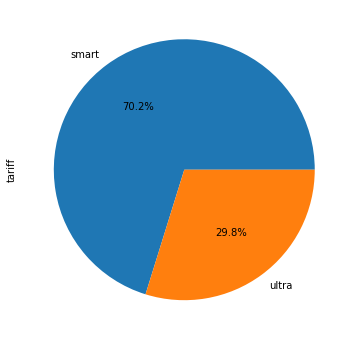

In [28]:
users['tariff'].value_counts().plot(kind='pie',figsize=(6,6), autopct='%1.1f%%'); # процентное соотношение тарифов

Пользователей тарифа smart больше более чем в 2 раза. Выборки совсем не одинаковые.

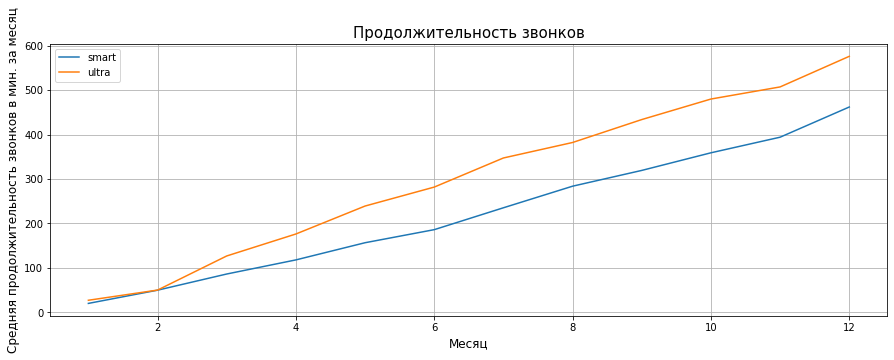

In [29]:
# Фильтр продолжительности звонков по тарифам
ultra_calls_sum = calls_sum[calls_sum['tariff']=='ultra'].drop(columns = ['user_id','tariff','source'], axis = 1)
smart_calls_sum = calls_sum[calls_sum['tariff']=='smart'].drop(columns = ['user_id','tariff','source'], axis = 1)

# Построение графика средней продолжительности звонков помесячно

x = range(1,13) # список с месяцами
plt.figure(figsize=(15, 5))
plt.plot(x, smart_calls_sum.mean(), ultra_calls_sum.mean());
plt.title ('Продолжительность звонков',fontsize = 15);
plt.xlabel('Месяц', fontsize=12);
plt.ylabel('Средняя продолжительность звонков в мин. за месяц', fontsize=12);
plt.legend(labels=['smart','ultra'])
plt.grid()

В среднем пользователи тарифа Ультра больше разговаривают. До перерасхода по минутам в 3000 в Ультра тарифе клиентам далеко. А вот клиентам Смарта едва хватает включенных минут, что часто приводит к перерасходу.

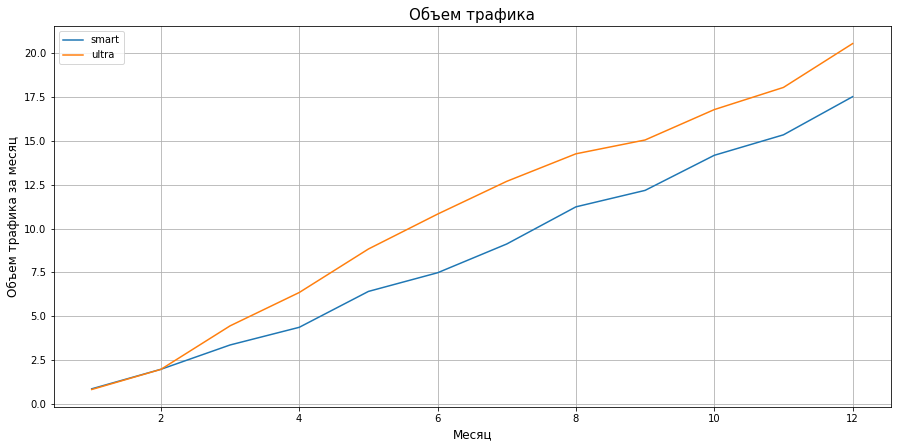

In [30]:
# Фильтр объема трафика по тарифам
ultra_internet_sum = internet_sum[internet_sum['tariff']=='ultra'].drop(columns = ['user_id','tariff','source'], axis = 1)
smart_internet_sum = internet_sum[internet_sum['tariff']=='smart'].drop(columns = ['user_id','tariff','source'], axis = 1)

# Построение графика среднего использования интернета помесячно

x = range(1,13) # список с месяцами
plt.figure(figsize=(15, 7))
plt.plot(x, smart_internet_sum.mean(), ultra_internet_sum.mean());
plt.title ('Объем трафика',fontsize = 15);
plt.xlabel('Месяц', fontsize=12);
plt.ylabel('Объем трафика за месяц', fontsize=12);
plt.legend(labels=['smart','ultra'])
plt.grid()

Интернет - самая популярная услуга. В среднем потребление интернета очень похоже по обоим тарифам, у клиентов Ультра чуть больше. Клинеты тарифа Ультра в основном укладываются в учтенный лимит в 30 Гб. А вот клиенты Смарта по большей части выходят за лимит в 15 Гб и часто платят сверх тарифа.

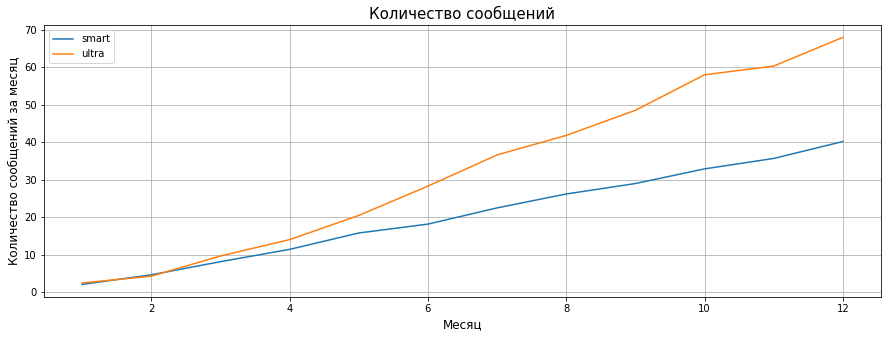

In [31]:
# Фильтр количества сообщений по тарифам
ultra_messages_count = messages_count[messages_count['tariff']=='ultra'].drop(columns = ['user_id','tariff','source'], axis = 1)
smart_messages_count = messages_count[messages_count['tariff']=='smart'].drop(columns = ['user_id','tariff','source'], axis = 1)

# Построение графика среднего количества сообщений помесячно

x = range(1,13) # список с месяцами
plt.figure(figsize=(15, 5))
plt.plot(x, smart_messages_count.mean(), ultra_messages_count.mean());
plt.title ('Количество сообщений',fontsize = 15);
plt.xlabel('Месяц', fontsize=12);
plt.ylabel('Количество сообщений за месяц', fontsize=12);
plt.legend(labels=['smart','ultra'])
plt.grid()

Сообщения - самая не популярная услуга. Клиенты тарифа Ультра активней используют смс, а также с большим запасом укладываются в 1000 смс в месяц. Клиентам тарифа Смарт тоже хватает лимита в 50 смс. До верхней границы еще 10 смс, но они не популярны, а значит и перерасхода тоже нет.

### Посчитайте среднее количество, дисперсию и стандартное отклонение.

In [32]:
ultra_calls_sum_m = ultra_calls_sum.T.mean() # Среднее значение количества минут по каждому пользователю тарифа Ультра
smart_calls_sum_m = smart_calls_sum.T.mean() # Среднее значение количества минут по каждому пользователю тарифа Смарт
ultra_internet_sum_m = ultra_internet_sum.T.mean() # Среднее значение объема трафика по каждому пользователю тарифа Ультра
smart_internet_sum_m = smart_internet_sum.T.mean() # Среднее значение объема трафика по каждому пользователю тарифа Смарт
ultra_messages_count_m = ultra_messages_count.T.mean() # Среднее значение количества сообщений по каждому пользователю тарифа Ультра
smart_messages_count_m = smart_messages_count.T.mean() # Среднее значение количества сообщений по каждому пользователю тарифа Смарт


In [33]:
# Cреднее количество, медиана, дисперсия и стандартное отклонение длительности разговора, 
# интернет-трафика и количества сообщений  для тарифа "Smart":
pd.options.display.float_format = '{:,.2f}'.format
data_smart=[[smart_calls_sum_m.mean(),smart_messages_count_m.mean(),smart_internet_sum_m.mean()],\
      [smart_calls_sum_m.median(),smart_messages_count_m.median(),smart_internet_sum_m.median()],\
      [np.var(smart_calls_sum_m, ddof=1),np.var(smart_messages_count_m, ddof=1),np.var(smart_internet_sum_m, ddof=1)],\
      [np.std(smart_calls_sum_m, ddof=1),np.std(smart_messages_count_m, ddof=1),np.std(smart_internet_sum_m, ddof=1)]]
columns_smart=['sum_calls','messages_count','internet_sum']
pd.DataFrame(data=data_smart,columns=columns_smart, index=['mean','median','var','std'])

,sum_calls,messages_count,internet_sum
mean,222.44,20.53,8.67
median,192.42,15.00,8.25
var,"21,127.72",343.44,25.25
std,145.35,18.53,5.03


In [34]:
# Cреднее количество, медиана, дисперсия и стандартное отклонение длительности разговора, 
# интернет-трафика и количества сообщений для тарифа "Ultra":
data_ultra=[[ultra_calls_sum_m.mean(),ultra_messages_count_m.mean(),ultra_internet_sum_m.mean()],\
      [ultra_calls_sum_m.median(),ultra_messages_count_m.median(),ultra_internet_sum_m.median()],\
      [np.var(ultra_calls_sum_m, ddof=1),np.var(ultra_messages_count_m, ddof=1),np.var(ultra_internet_sum_m, ddof=1)],\
      [np.std(ultra_calls_sum_m, ddof=1),np.std(ultra_messages_count_m, ddof=1),np.std(ultra_internet_sum_m, ddof=1)]]
columns_ultra=['sum_calls','messages_count','internet_sum']
pd.DataFrame(data=data_ultra,columns=columns_ultra,index=['mean','median','var','std'])

,sum_calls,messages_count,internet_sum
mean,302.29,32.68,10.89
median,270.58,24.62,9.25
var,"48,655.74",772.54,51.85
std,220.58,27.79,7.20


Различия между средним и медианой не велики, значит выбросов не много. 

Наибольшее стандартное отклонение  наблюдается у продолжительности звонков на тарифе Ультра, так же у сообщений на обоих тарифах. Значит есть большой разброс в значениях, особенно в большую сторону, что так же видно по медиане. И минимальное стандартное отклонение у трафика на тарифе Смарт. Это значит, что разброс значений находится на небольшом промежутке.

В среднем на тарифе Ультра используют 302,3 мин для звонков, 32,7 смс и 10,9 гб интернета.

В среднем на тарифе Смарт используют 222,4 мин для звонков, 20,5 смс и 8,7 гб интернета.

### Постройте гистограммы. Опишите распределения.

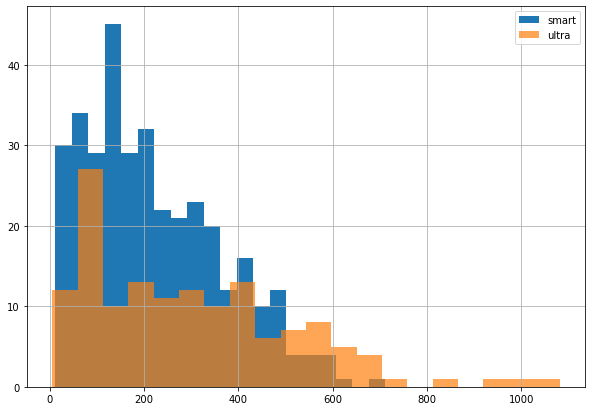

In [35]:
# Строю гистограммы длительности разговора:
smart_calls_sum_m.hist(bins=20,figsize=(10,7),label='smart');
ultra_calls_sum_m.hist(bins=20,figsize=(10,7),alpha=0.7,label='ultra');
plt.legend();

Распределения напоминают распределение Пуассона. Гистограммы смещены вправо, среднее больше медианы. Мало кто разговаривает больше 600 мин.

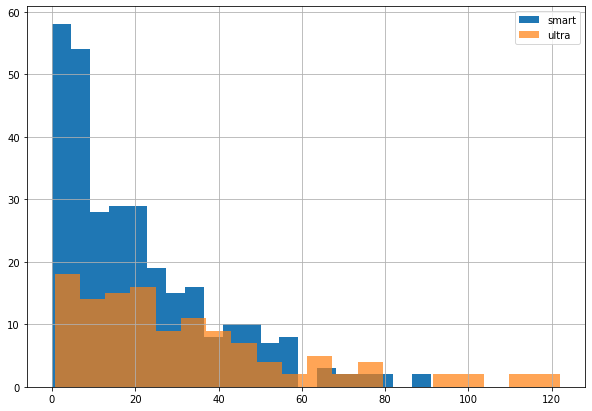

In [36]:
#Строю гистограммы количества сообщений:
smart_messages_count_m.hist(bins=20,figsize=(10,7),label='smart');
ultra_messages_count_m.hist(bins=20,figsize=(10,7),alpha=0.7,label='ultra');
plt.legend();

Распределения напоминают распределение Пуассона. Гистограммы смещены вправо, среднее больше медианы.

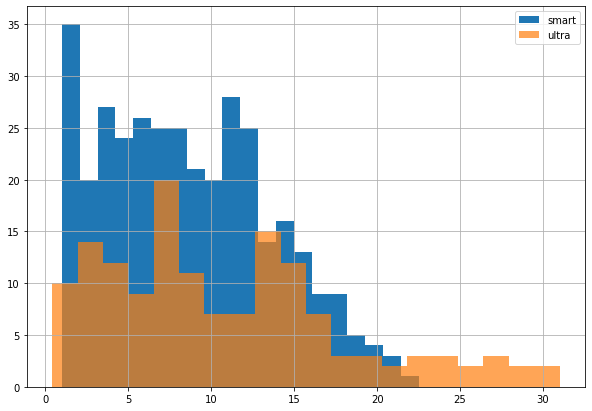

In [37]:
#Строим гистограммы объема интернет-трафика:
smart_internet_sum_m.hist(bins=20,figsize=(10,7),label='smart');
ultra_internet_sum_m.hist(bins=20,figsize=(10,7),alpha=0.7,label='ultra');
plt.legend();

Распределения напоминают распределение Пуассона. Гистограммы смещены вправо, среднее больше медианы. Почти все укладываются в 20 Гб.

***Вывод:***

 - Пользователей тарифа Смарт больше более чем в 2 раза, чем пользователей тарифа Ультра.
 - Гистограммы по обоим Тарифам распределены не нормально, и напоминают распределение Пуассона.
 - По интернету. Пользователи тарифа Смарт не редко превышают лимит по интернету. Со средним значением в 8,6 Гб, при лимите в 15 Гб. Так же хорошо видно из гистограммы. По тарифу Ультра в основном укладываются в лимит интернета.
 - По звонкам. Пользователи тарифа Смарт в основном укладываются в лимит по звонкам в 500 мин. Не многие превышают лимит. Клиенты тарифа Ультра укладываются в лимит по минутам.
 - По сообщениям. Пользователи тарифа Смарт в большинстве укладываются в лимит в 50 смс. Клиентам тарифа Ультра с большим запасом хватает сообщений с лимитом в 1000.

## Проверка гипотез.

###  Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

На основе анализа данных проверим гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Предположим, что средняя выручка пользователей тарифа Ультра больше, чем тарифа Смарт. Исходя из того, что мы всегда формулируем нулевую гипотезу со знаком равенства, нулевая гипотеза будет звучать следующим образом:

*** H0 - Cредняя выручка пользователей тарифов «Ультра» и «Смарт» равны. ***

У меня есть основания полагать, что различаться они будут в одну сторону. Соответственно односторонняя альтернативная гипотеза будет звучать:

*** H1 - Cредняя выручка пользователей тарифа «Ультра» больше средней выручки пользователей тарифа «Смарт». ***

Я буду сравнивать равенство среднего двух генеральных совокупностей по взятым из них выборкам, для этого есть метод scipy.stats.ttest_ind (array1, array2, equal_var).

In [38]:
# средняя выручка по тарифу Смарт по каждому пользователю 
final_sum_smart = final_sum[final_sum['tariff']=='smart'].drop(columns = ['user_id','tariff']).T.mean()
# средняя выручка по тарифу Ультра по каждому пользователю 
final_sum_ultra = final_sum[final_sum['tariff']=='ultra'].drop(columns = ['user_id','tariff']).T.mean()

In [39]:
alpha = 0.01 # пороговое значение альфа
results = st.ttest_ind(final_sum_smart, final_sum_ultra, equal_var = False) 
print('P-value:', results.pvalue / 2)

if (results.pvalue / 2 < alpha):
     print("Отвергаем нулевую гипотезу")
else:
     print("Не получилось отвергнуть нулевую гипотезу")
results

P-value: 2.0994461196907383e-16
Отвергаем нулевую гипотезу


Ttest_indResult(statistic=-8.772027926777717, pvalue=4.1988922393814766e-16)

In [40]:
# Проверка средней выручки.
print ('Средняя выручка по тарифу Смарт:',final_sum_smart.mean())
print ('Средняя выручка по тарифу Ультра:',final_sum_ultra.mean())

Средняя выручка по тарифу Смарт: 684.6073809523807
Средняя выручка по тарифу Ультра: 1148.1418918918919


Можно смело отвергать нулевую гипотезу. Даже если мы возьмем пороговое значение меньше, нулевая гипотеза остается очень маловероятной. Все говорит в пользу альтернативной гипотезы. А значит мы принимаем гипотезу о том, что средняя выручка пользователей тарифа «Ультра» больше средней выручки пользователей тарифа «Смарт». 

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

На основе анализа данных проверим гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Предположим, что средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов. Исходя из того, что мы всегда формулируем нулевую гипотезу со знаком равенства, нулевая гипотеза будет звучать следующим образом:

*** H0 - Cредняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов. ***

Я не могу предположить в какую сторону они будут различаться, поэтому сформулирую двустороннюю альтернативную гипотезу:

*** H1 - Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. ***

Я буду сравнивать равенство среднего двух генеральных совокупностей по взятым из них выборкам, для этого есть метод scipy.stats.ttest_ind (array1, array2, equal_var).

In [41]:
final_sum = final_sum.merge(users[['user_id','city']],on='user_id') # добавляем столбец по городу
final_sum_mocsow = final_sum[final_sum['city']=='Москва'] # фильтрую по городу Москва
final_sum_mocsow = final_sum_mocsow.drop(columns = ['user_id','tariff','city']).T.mean() # средняя выручка по Москве по каждому пользователю 
final_sum_regions = final_sum[final_sum['city']!='Москва'] # фильтрую по регионам
final_sum_regions = final_sum_regions.drop(columns = ['user_id','tariff','city']).T.mean() # средняя выручка по регионам по каждому пользователю 

In [42]:
alpha = 0.01 # пороговое значение альфа
results = st.ttest_ind(final_sum_mocsow, final_sum_regions, equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
     print("Отвергаем нулевую гипотезу")
else:
     print("Не получилось отвергнуть нулевую гипотезу")
results

P-value: 0.5864727434062588
Не получилось отвергнуть нулевую гипотезу


Ttest_indResult(statistic=-0.545166139500297, pvalue=0.5864727434062588)

In [43]:
print ('Средняя выручка по Москве:',final_sum_mocsow.mean())
print ('Средняя выручка по регионам:',final_sum_regions.mean())

Средняя выручка по Москве: 795.489898989899
Средняя выручка по регионам: 829.0327903091058


Не получилось отвергнуть нулевую гипотезу, значение p-value слишком велико, чтобы отвергнуть ее. После сравнения средних выручек видно насколько они близко по значениям. А значит мы принимаем нулевую гипотезу о том, что средняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов.

***Вывод:***

На основании статистических тестов были приняты следующие гипотезы:
* Cредняя выручка пользователей тарифа «Ультра» больше средней выручки пользователей тарифа «Смарт».
* Cредняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов.

## Общий вывод.

Я проанализировал данные о 500 клиентах компаниии "Мегалайн", проверил 2 гипотезы и выяснил:

* Пользователей тарифа Смарт больше более чем в 2 раза, чем пользователей тарифа Ультра. Люди охотней выбирают тариф Смарт.
* Пользователи чаще и больше переплачивают по тарифу Смарт, чем пользователи тарифа Ультра.
* Доступ в интернет - самая популярная услуга, им не воспользовался всего 1 человек из выборки. И чаще всего именно по этой услуге идет переплата по тарифу. В основном по тарифу Смарт.
* Пользователи тарифа Смарт чаще и больше переплачивают по тарифу, чем пользователи тарифа Ультра.
* Отвергли нулевую гипотезу в пользу альтернативной. Принимаем альтернативную гипотезу о том, что средняя выручка пользователей тарифа «Ультра» больше средней выручки пользователей тарифа «Смарт».
* Не получилось отвергнуть нулевую гипотезу. Принимаем нулевую гипотезу о том, что средняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов.

Тариф Смарт принес больше денег. Общая выручка по тарифу Смарт за 2018 год составила 2 875 351 руб., что больше чем по тарифу Ультра на 840 000 руб. За счет того, что пользователей больше в 2 раза и много переплат. Но средняя выручка у тарифа Ультра больше на 460р., плюс по большей части отсутствие переплат, делает Ультра перспективным тарифом.

Можно сделать вывод о том, что вкладывать рекламный бюджет стоит в тариф Ультра. Чем больше привлечь клиентов по этому тарифу, тем больше вырастет выручка.
